## quest
- 분석 스토리 작성(목표변수:생존여부)
    - dataset : TitanicFromDisaster_train.csv
    - DDA, EDA 진행
    - 설명변수는 연속형, 범주형 섞어 7개 이상

In [63]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd

In [64]:
df_titanic = pd.read_csv('../../datasets/TitanicFromDisaster_train.csv')
df_titanic[:2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [65]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [66]:
df_titanic_sur = df_titanic[['Age', 'Sex', 'Ticket','Fare','Embarked','Survived','Pclass' ]]
df_titanic_sur

,Age,Sex,Ticket,Fare,Embarked,Survived,Pclass
0,22.0,male,A/5 21171,7.2500,S,0,3
1,38.0,female,PC 17599,71.2833,C,1,1
2,26.0,female,STON/O2. 3101282,7.9250,S,1,3
3,35.0,female,113803,53.1000,S,1,1
4,35.0,male,373450,8.0500,S,0,3
...,...,...,...,...,...,...,...
886,27.0,male,211536,13.0000,S,0,2
887,19.0,female,112053,30.0000,S,1,1
888,NaN,female,W./C. 6607,23.4500,S,0,3
889,26.0,male,111369,30.0000,C,1,1


#### 데이터 전처리 
- null 값 삭제 

In [67]:
df_titanic_sur.isnull().sum()

Age         177
Sex           0
Ticket        0
Fare          0
Embarked      2
Survived      0
Pclass        0
dtype: int64

In [68]:
df_titanic_sur = df_titanic_sur.dropna()
df_titanic_sur.isnull().sum()

Age         0
Sex         0
Ticket      0
Fare        0
Embarked    0
Survived    0
Pclass      0
dtype: int64

## 상관관계 확인 
- 목표 변수 : 'Survived' -> 분포 : 언발란스
    - 연속형일 경우 : 정규화 확인
    - 범주형일 경우 : 밸런스 여부 확인 
- 설명 변수 : 
    - 'Age' : 연령대별 생존에 영향이 있음, 대게 고연령층이 죽고, 저연령층이 살아남은 경향이 있음.
    - 'Sex': 여성의 생존 비율이 높음.
    - 'Ticket': id값으로써 분석에는 의미가 없어보임
    - 'Pclass' : 상대적으로 1st class인 승객들의 생존률이 높음 
    - 'Fare' : 적은 영향이기는 하나, 높은금액대를 지출한 승객이 살아남은 확률이 더 큰 경향을 보임.
    - 'Embarked' : 상대적으로  'C'항구에서 탑승한 승객들의 생존률이 높음.
- 분석 story : 생존에 영향을 미치는 분류를 확인함으로써 배에 탑승시 어떤 방식이 생존률을 높이는지 분석하였음
            배 탑승시 생존율을 높이는 여러 방법 중 하나는 1등급 티켓을 높은 가격대로 구매하고,'C'항구에서 탑승하도록 하는 방법이 가장 생존률이 높아지는 방법임을 분석하였다.  

#### 데이터 타입과 분포  
- 목표 변수 확인 rf) 대부분이 범주형(예측이 높아야하기떄문)

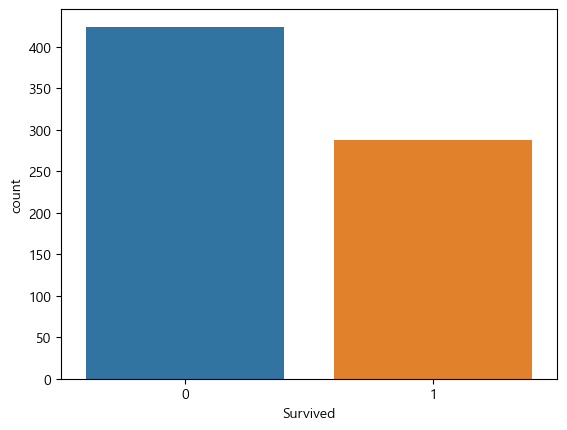

In [69]:
sns.countplot(data=df_titanic_sur, x='Survived')
plt.show()

In [70]:
df_titanic_sur.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       712 non-null    float64
 1   Sex       712 non-null    object 
 2   Ticket    712 non-null    object 
 3   Fare      712 non-null    float64
 4   Embarked  712 non-null    object 
 5   Survived  712 non-null    int64  
 6   Pclass    712 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 44.5+ KB


#### object로 변환 대상 : Survived, Pclass

In [71]:
df_titanic_sur[['Survived','Pclass']] = df_titanic_sur[['Survived','Pclass']].astype(object)

C:\Users\02-19\AppData\Local\Temp\ipykernel_1180\237717951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_titanic_sur[['Survived','Pclass']] = df_titanic_sur[['Survived','Pclass']].astype(object)


In [72]:
df_titanic_sur.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       712 non-null    float64
 1   Sex       712 non-null    object 
 2   Ticket    712 non-null    object 
 3   Fare      712 non-null    float64
 4   Embarked  712 non-null    object 
 5   Survived  712 non-null    object 
 6   Pclass    712 non-null    object 
dtypes: float64(2), object(5)
memory usage: 44.5+ KB


In [73]:
titanic_list = df_titanic_sur.describe().columns.to_list()  # 연속형 확인 
titanic_list

['Age', 'Fare']

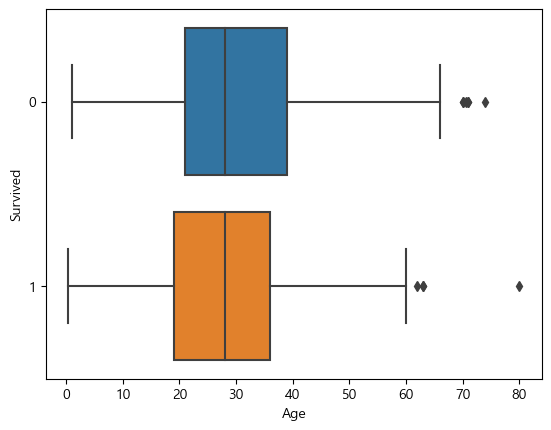

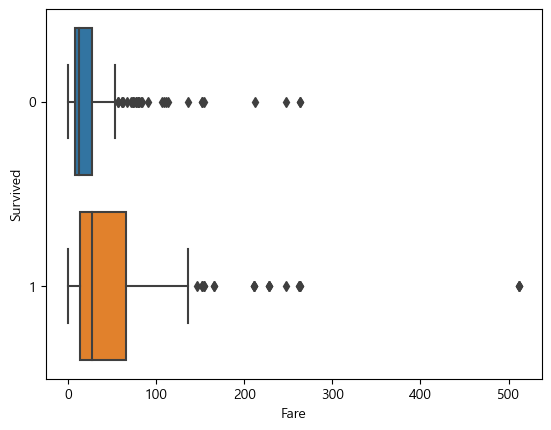

In [123]:
for item in titanic_list :
    sns.boxplot(data=df_titanic_sur, x=item, y='Survived', orient='h') # orient='h'목표변수 y에 위치하게끔
    plt.show()

#### 이상치 제거 

In [132]:
# 각 변수마다 이상치를 제거하는 과정을 수행하는 함수
def remove_outliers(df, variable, factor=1.5):
    Q1 = df[variable].describe()['25%']
    Q3 = df[variable].describe()['75%']
    IQR = Q3 - Q1
    bound_up = Q3 + factor * IQR
    bound_low = Q1 - factor * IQR
    condition = (df[variable] <= bound_up) & (df[variable] >= bound_low)
    return df[condition]

In [130]:
# 각 변수에 대해 이상치 제거 수행
for item in titanic_list:
    df_titanic_sur_condition = remove_outliers(df_titanic_sur_condition, item)

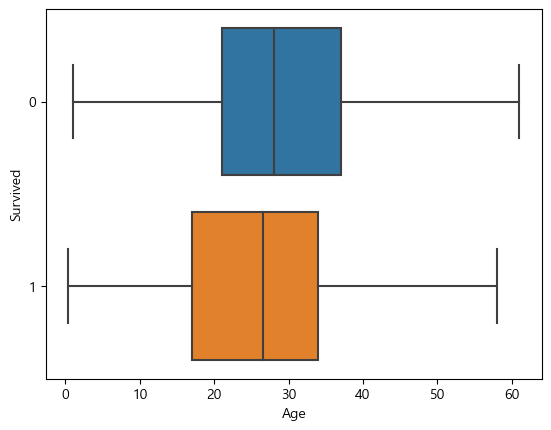

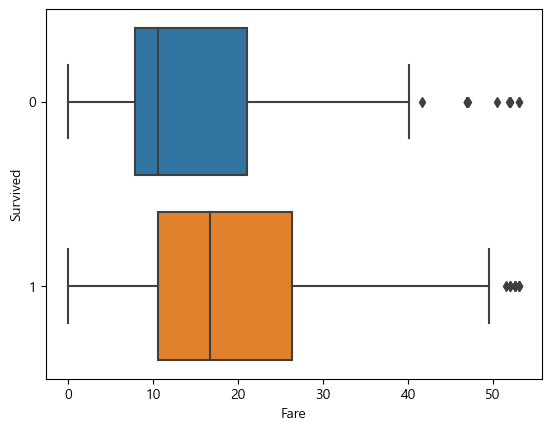

In [131]:
# 다변수에 대한 박스플롯 그리기
for item in titanic_list:
    sns.boxplot(data=df_titanic_sur_condition, x=item, y='Survived', orient='h')
    plt.show()

#### 연속형

In [91]:
titanic_object_list= df_titanic_sur.describe(include=object).drop(columns=['Survived']).columns.to_list()
titanic_object_list

['Sex', 'Ticket', 'Embarked', 'Pclass']

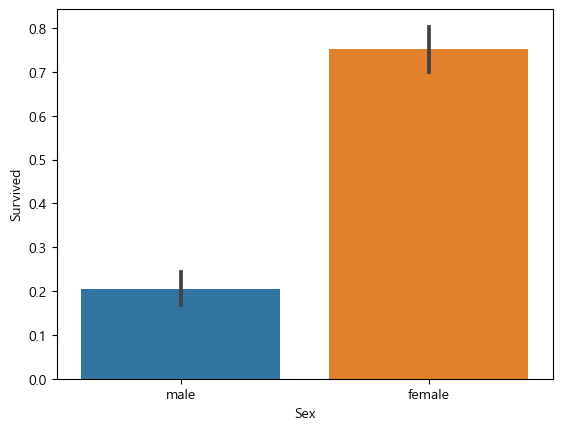

In [101]:
sns.barplot(data=df_titanic_sur, x='Sex', y='Survived')
plt.show()

In [121]:
df_titanic_sur['Ticket'].value_counts()

Age    Sex     Ticket        Fare     Embarked  Survived  Pclass
0.75   female  2666          19.2583  C         1         3         2
21.00  male    S.O.C. 14879  73.5000  S         0         2         2
32.00  male    1601          56.4958  S         1         3         2
24.00  female  PC 17477      69.3000  C         1         1         2
0.42   male    2625          8.5167   C         1         3         1
                                                                   ..
23.00  male    347468        7.8542   S         0         3         1
               349204        7.8958   S         0         3         1
               7267          9.2250   S         0         3         1
               PC 17759      63.3583  C         1         1         1
80.00  male    27042         30.0000  S         1         1         1
Length: 708, dtype: int64

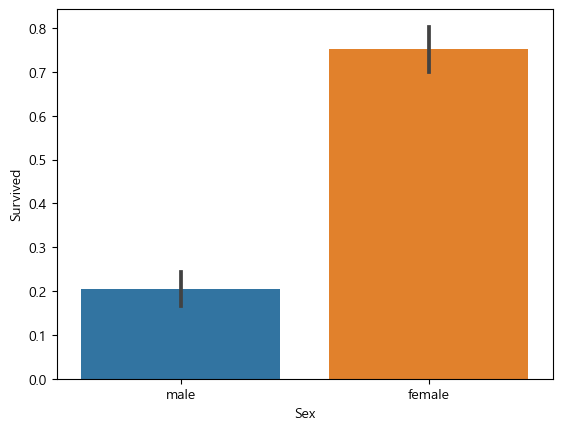

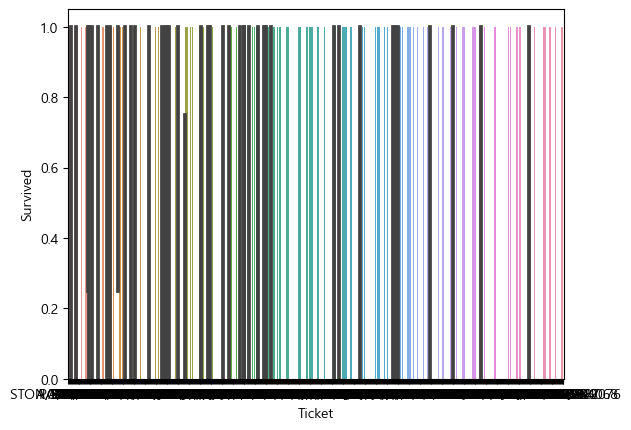

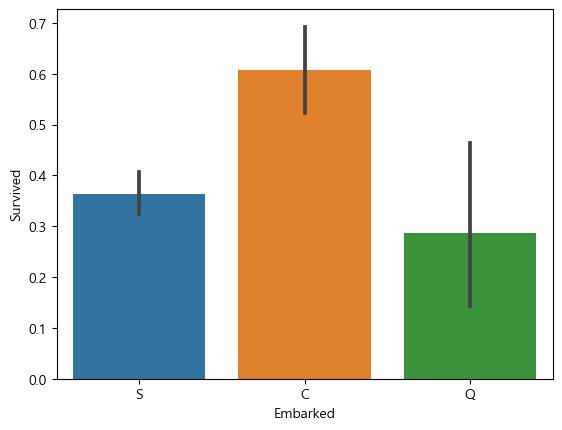

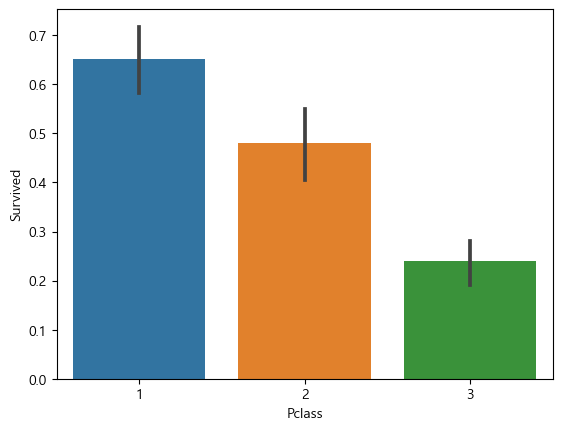

In [102]:
for item in titanic_object_list :
    sns.barplot(data=df_titanic_sur, x=item, y='Survived')
    plt.show()

#### Ticket 시각화

In [139]:
# 상위 7개 순위
df_titanic_sur_sum = pd.pivot_table(data=df_titanic_sur, index='Ticket', values='Survived', aggfunc='sum' ) #총합으로 요약
df_titanic_top_list = df_titanic_sur_sum.sort_values(by='Survived', ascending=False).iloc[:7].index.to_list()
df_titanic_top_list

['2666', '113760', '110152', 'PC 17755', 'PC 17572', '29106', 'PC 17757']

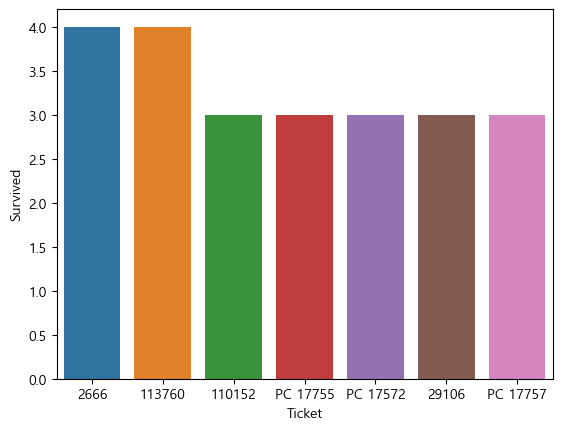

In [140]:
sns.barplot(data=df_titanic_sur, x='Ticket', y='Survived', estimator=sum, order=df_titanic_top_list) 
plt.show()